<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars/sem_2/yYGiBqtirSM.jpg" height="300" width="300"> 

# <center> R для тервера и матстата. <br>  <br> Домашка номер раз! </center>

Данный ноутбук является домашкой по курсу «R для теории вероятностей и математической статистики» (РАНХиГС, 2020). Автор ноутбука - [вот этот парень по имени Филипп.](https://vk.com/ppilif) Если у вас для него есть деньги, слава или женщины, он от этого всего не откажется. Ноутбук распространяется на условиях лицензии [Creative Commons Attribution-Share Alike 4.0.](https://creativecommons.org/licenses/by-sa/4.0/) При использовании обязательно упоминание автора курса и аффилиации. При наличии технической возможности необходимо также указать активную гиперссылку на [страницу курса.](https://fulyankin.github.io/r_probability/) На ней можно найти другие материалы. Фрагменты кода, включенные в этот notebook, публикуются как [общественное достояние.](https://creativecommons.org/publicdomain/zero/1.0/)

----------------------


__Краткий брифинг:__


* __Дедлайн:__ __10.05.20__
* Первая домашка затрагивает то, что мы смотрели на первых двух парах.
* Тетрадка делится на две части: __рыбёшки (65 баллов) и кит (35 баллов).__
* Часть задач нужно решить не только с помощью симуляций, но и вручную.
* Ваша команда пытается решить как можно больше задач и присылает их мне.
* Если очень хочется, можем устроить после всех дедлайнов серию из пар с разбором домашек. 
* Свои решения постараюсь выложить после дедлайна.
* __WARNING:__ [на страничке курса](https://github.com/FUlyankin/r_probability) есть решение домашек прошлого года. Ими можно пользоваться. Там много полезного и интересного! А ещё не стесняйтесь задавать вопросы :) 

---------------------------

* __Как оформлять домашки:__ 
    1. Компьютерные домашки оформляем либо в связке R + LaTeX, либо в юпитерских тетрадках (если хочется новых технологий), либо в связке R + Markdown. Все шаблоны для этого есть в репозитории. Пожалуйста не нужно присылать мне просто тупой код с выводами в виде комментариев, написанных через решёточки. Я от этого могу сойти с ума. 
    2. Ручные решение можно оформлять двумя способами: либо вбивать их в файл вместе с кодом. Благо в Markdown, юпитере и других местах поддерживаются теховские формулу. Либо аккуратно оформляйте их на бумаге и присылайте свёрстанную pdf-ку. Не надо кидать мне фотки по одной. Я от этого тоже сойду с ума. Вариант с вбиванием в основной файл - предпочтительнее. 
    
* На странице курса висит [видео-инструкция по оформлению.](https://yadi.sk/i/Pxp_pByP6Em9-A)

---------------------------

Ближе к делу. С чего начинается любой скрипт? Правильно! С подгрузки пакетов :) 

In [109]:
library("ggplot2")  # Пакет для красивых графиков 
library("reshape2")

library("grid")     # Пакет для субплотов

# Отрегулируем размер картинок, которые будут выдаваться в нашей тетрадке
library('repr')
options(repr.plot.width=4, repr.plot.height=3)

# Внимание! Если вы делаете дз в Rstudio, то вам не нужны пакеты grid, repr и т.п.
# Вам нужен только пакет ggplot2! 

### [2]  Задачка 1

Давайте уточним [правило трёх сигм.](https://ru.wikipedia.org/wiki/Среднеквадратическое_отклонение#Правило_трёх_сигм)

__Утверждение:__ $99.7\%$ вероятностной массы случайной величины $X \sim N(\mu,\sigma^2)$ лежит в интервале $\mu \pm c \cdot \sigma$. Чему равно значение константы $c$? А если речь про 80\%? 

In [38]:
# деление на два, так как в обоих хвостах должно остаться alpha/2
qnorm(1 - (1 - 0.997)/2)
qnorm(1 - 0.2/2)

[1] 2.967738

[1] 1.281552

### [3] Задачка 2

Давайте попробуем проверить несколько свойств математических ожиданий и дисперсий, которые вы доказали на лекциях по теории вероятностей в прошлом семестре. Выберите конкретные случайные величины (любые) и проверьте для них утверждения, перечисленные ниже. 

In [31]:
# Хочу экспоненциальную и равномерную, нанизанную на экспоненциальную!
# Так зависимсоть между величинами будет

n_obs = 10^6

x = rexp(n_obs, rate = 2)
y = x + runif(n_obs, min = 2, max = 5)

__[а]__ Верно ли, что $E(X + Y) = E(X) + E(Y)$? 

In [32]:
# a) Из курс тервера мы знаем, что это правда всегда 
mean(x + y)
mean(x) + mean(y)

[1] 4.501121

[1] 4.501121

__[б]__ Верно ли, что $E(X \cdot Y) = E(X) \cdot E(Y)$?

In [33]:
# b) Ну тут явно чего-то не хватает...
mean(x*y)
mean(x)*mean(y)

[1] 2.253552

[1] 2.002232

In [34]:
# Давайте посмотрим лекции по терверу и вспомним чего не хватает :) 
mean(x)*mean(y) + cov(x,y)

[1] 2.253553

__[в]__ Верно ли, что $Var(X + Y) = Var(X) + Var(Y) + 2 \cdot Cov(X,Y)$? 

In [35]:
#c) Это чистая правда! В лекциях даже доказательство есть!
var(x + y)
var(x) + var(y) + 2*cov(x,y)

[1] 1.755138

[1] 1.755138

__[г]__ Верно ли, что $Var(X \cdot Y) = Var(X) \cdot Var(Y)$? 

In [36]:
#d) Ложь! Очередная! А слабо найти правильную формулу? Она довольно неочевидна :)
var(x*y)
var(x)*var(y)

[1] 8.256436

[1] 0.2515684

__[д]__ Верно ли, что если $Cov(X, Y) = 0$, то две случайные величины независимы? Удастся ли проверить это с помощью генераций? 

Это наглая ложь! Простейший пример. Пусть случайная величина $X$ равновероятно принимает три значения:

|$X$|$-1$|$0$|$1$| 
|---|----|---|---|
| $P$  |1/3 |1/3|1/3|

Пусть $Z = |X|$.

|$Z$|$0$|$1$| 
|---|---|---|
| $P$  |1/3|2/3|

Тогда эти две виличины явно зависимы. Одна выражается через другую. Но при этом 

$$
Cov(X,Z) = E(X \cdot Z) - E(X) \cdot E(Z) = 0.
$$

In [37]:
x = sample(c(-1,0,1), size = n_obs, replace = TRUE)
z = abs(x)  # задаём зависимость между z и x  
cov(x,z)    # получаем близкое к нулю число

[1] 3.626336e-05

### [10]  Задачка 3

Таня сидит дома на самоизоляции уже третий месяц. Интернет отключили. Ей скучно. Она достала. из ящика $5$ лампочек, вкрутила их в люстру, поставила посреди комнаты стул и стала ждать, когда первая лампочка перегорит. Время работы лампочек, $T$, имеет экспоненциальное распределение с параметром $\lambda = 0.2$ минут.

-  Какова вероятность того, что первая лапочка проработает больше $10$ минут? 

In [3]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  немого кода там

# В этом пункте не надо было ничего генерировать!

# P(T1 > 10) = 1 - P(T1 <= 10) = 1 - F(10)
1 - pexp(10, rate = 0.2)

[1] 0.1353353

-  Чему равен для первой лампочки $95\%$ квантиль? Как проинтерпретировать это число? 

__Ответ:__  $95\%$ значений случайной величины меньше, чем $14.98$, т.е. с $95\%$ вероятностью лампочка проработает меньше этого времени

In [4]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  немого кода сям
qexp(0.95, rate=0.2)

[1] 14.97866

Пусть случайная велчина $X = \min(T_1, \ldots, T_5)$ - время до перегорания первой лампочки. Оцените: 

- $P(X > 10)$
- $P(X > 10 \mid T_1 > 5)$
- $E(X)$
- $E(X \mid T_1 > 5)$

In [13]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  немого кода пам
n_obs = 10**6
k = 5

T = rexp(n_obs*k, rate=0.2)
T = matrix(T, nrow = k, ncol=n_obs) # каждая строка - лампочка, столбец - наблюдение

T1 = T[1,] # первая строка это первая лампа

X = apply(T, 2, min) # минимум по каждому столбцу

mean(X > 10)
mean(X[T1 > 5] > 10)

[1] 4.5e-05

[1] 0.0001222298

In [14]:
mean(X)
mean(X[T1 > 5])

[1] 1.000242

[1] 1.246774

Пусть случайная величина $Y = \max(T_1, \ldots, T_5)$ - время до перегорания последней лампочки. Оцените 

- $E(Y - X)$
- $P(Y > 2 X)$ 
- $Cov(X,Y)$,
- $Var(X), Var(Y)$, какая из дисперсий больше, почему?

In [15]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  немого шкода

Y = apply(T, 2, max) # максимум по каждому столбцу

mean(Y - X)
mean(Y > 2*X)
cov(X, Y)
var(X)
var(Y)

[1] 10.41716

[1] 0.991933

[1] 0.9957708

[1] 1.001141

[1] 36.65259

__[бонусные 20 баллов]__

Попробуйте руками на бумажке выяснить какое распределение будет у случайных велчин $X$ и $Y$. 

__[а]__ Найдите их плотности распрееления. Представим, что у нас $n$ лампочек. Как плотности распределения зависят от $n$?

__Решение:__

Тут ничего нового. На парах вы должны были решать задачку с поиском того как распределён максимум и минимум из нескольких случайных величин. [Вот решение из учебника Черновой.](https://nsu.ru/mmf/tvims/chernova/tv/lec/node68.html) Я тут лишь выпишу итоговый результат: 

\begin{equation*}
\begin{aligned} 
& F(y) = (F(t))^n = (1 - e^{-\lambda y})^n, y \ge 0 \\
& F(x) = 1 - (1 - F(t))^n = 1 - e^{-\lambda n x}, x \ge 0
\end{aligned} 
\end{equation*}

Чтобы получить плотности просто возьмём производные: 

\begin{equation*}
\begin{aligned} 
& f(y) = \lambda n e^{-\lambda y} (1 - e^{-\lambda y})^{(n-1)}, y \ge 0  \\
& f(x) = \lambda n e^{-\lambda n x}, x \ge 0 
\end{aligned} 
\end{equation*}

Обратите внимание, что $X = \min(T_1, \ldots, T_n) \sim Exp(n \lambda)$. Это одно из свойств экспоненциальных величин. Минимум из них всегда распределён экспоненциально.

Нарисуем графики с зависимостью от $n$ при фиксированном $\lambda$. 

In [ ]:
lambda = 0.2 


Если посчитать предел по $n$ для функции распределения, можно обнаружит к чему будет сходиться последовательность случайных величин $


В задаче $15$ пункте в из второй домашки прошлого года можно в качестве бонуса посмотреть на ещё один пример сходимости максиуммов, но уже к экспоненциальному распределению. 

__[б]__ Найдите $\mathbb{E}(Y - X)$. Куда оно стремится при $n \to \infty$?

__Решение:__ 

$$
\mathbb{E}(Y - X) = \mathbb{E}(Y) - \mathbb{E}(X) 
$$

Мы знаем, что  $\mathbb{E}(X) = \frac{1}{\lambda n}$, так как $X \sim Exp(n \lambda)$. Можно было бы найти его по-честному. Для этого пришлось бы взять интеграл: 

$$
\mathbb{E}(X) = \int_0^{+\infty} t \cdot \lambda n e^{-\lambda n t} dt = \frac{1}{\lambda n} \int_0^{+\infty} w^{2 - 1} e^{-w} dw = \frac{1}{\lambda n} \cdot \Gamma(2) = \frac{1}{\lambda n}.
$$

Можно было бы проинтегрировать по частям, но это жутко неудобно. Лучше воспользоваться гамма-функцией. Если вам не повезло с семинаристом по матану и вы не научились это делать, [вот эта маленькая виньетка](https://drive.google.com/drive/u/1/folders/0BzLQByfHfn5bTGhSVUltQnpEbkE) может помочь. Там же немного задачек на бета-функцию.

In [8]:
### решение на бумажке


- Если это возможно, найдите совместную плотность распределения $f(x, y)$
- Найдите $Cov(X, Y)$. Как она зависит от $n$? Куда она сходится при $n \to \infty$?

__Решение:__ 

### [5]  Задачка 4

Самара стажировался в Бирмане, но его закрыли на карантин. Поэтому он пошёл работать в магазин кассиром и взял себе псевдоним "баба Зина".

Время между приходами людей в магазин распределено экспоненциально. В среднем за $10$ минут приходит $5$ покупателей. Время обслуживания тоже имеет экспоненциальное распределение. В среднем за $10$ минут баба Зина может обслужить $6$ человек. 

- Какова вероятность того, что в очереди стоит ровно $5$ человек? 
- Какова средняя длина очереди? 
- Постройте для длины очереди гистограмму. Как думаете какое у неё распределение?

In [9]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  ещё код


# В задачке надо смотреть на диапазоны в 10 минут. 


В магазин на работу вышла тётя Маша. Она обслуживает в среднем $7$ покупателей за $10$ минут. Два клиента подошли к кассам одновременно. Какова вероятность того, что баба Зина обслужит клиента быстрее? 

In [10]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  снова код

### [5]  Задачка 5

Пока мир сидит на самоизоляции, технологические компании [тестируют свои беспилотные машины и поезда.](https://www.rbc.ru/technology_and_media/03/04/2020/5e871ecf9a794784dd22f1de)

Например, прямо сейчас от станции Ромашково друг за другом в одном направлении отходит $100$ паровозиков с интервалом в одну минуту. Стартовые скорости паравозиков - независимые, равномерные на отрезке $[0;1]$ случайные величины. Когда более быстрый паровозик догоняет более медленный, они снижает свою скорость до скорости догнанного паровозика. 

Через достаточно длинный интервал времени паровозики разобьются на несколько групп. С помощью симуляций найдите ответ на следующие вопросы.

__[бонусные 10 баллов]__ найдите решение пунктов __а, б, в__ руками на бумажке. (это задачка номер 78 из [культурного кода)](https://github.com/bdemeshev/probability_dna/blob/master/probability_dna.pdf)

__[а]__  Какова вероятность того, что пятый паровозик - лидер очередной группы? 

__Решение:__  

Чтобы быть лидером своей группы пятый паровозик должен ехать медленнее первых четверых. Из-за того, что мы имеем дело с экспоненциальным распределением, это происходит с вероятностью $\frac{1}{5}$. 

In [17]:
n_obs = 10**6

m = 0
for(i in 1:n_obs){
    x = runif(100) # одна стартовая раскладка скоростей
    
    cnt = 0
    for(item in x[1:4]){
        cnt = cnt + (item > x[5])
    }

    # если скорость всех четырёх выше пятого, он лидер
    if(cnt == 4){
        m = m + 1 
    }
}

m/n_obs

[1] 0.200114

__[б]__  Пусть $X$ - число групп, на которое разбились паравозики. На сколько групп в среднем разбиваются паравозики?

__Решение:__ 

Пусть случайная величина $X_i$ принимает значение $1$, если $i-$ый паровозик является лидером своей группы. Тогда числу групп равно 

$$
X = X_1 + \ldots + X_n.
$$

По свойствам математического ожидания, ожидание суммы всегда равно сумме ожиданий. Математическое ожидание $X_i$ равно вероятности того, что $i-$ый паровозик возглавляет свою группу. Паровозик лидер, если все кто перед ним едут быстрее. В силу равномерности получаем, что $i-$ый паровозик лидер с вероятностью $\frac{1}{i}$. То есть:   

$$
E(X) = E(X_1) + \ldots + E(X_n) = 1 + \frac{1}{2} + \frac{1}{3} + \ldots + \frac{1}{n} 
$$

In [18]:
s = 0 
for(i in 1:100){
    s = s + 1/i
}

s # при симуляциях должны оказаться около этого числа 

[1] 5.187378

Чтобы выяснить число групп при симуляциях, не надо генерировать время. Мы в состоянии выяснить их число одним проходом по сгенерированному нами массиву. 

```
0.1, 0.2, 0.3, 0.5, 0.4
```

Самая первая скорость - минимальная. Никто не сможет отстать от первого паровозика. В итоге у нас будет только одна группа. 


```
0.2, 0.5, 0.3, 0.1, 0.4
```

Четвёртый паровозик отстанет от первого, так как его скорость меньше, и создаст свою группу с блэкджеком и машинистками. Получается, что если мы хотим понять сколько групп из паровозиков у нас получится, мы должны взять первый элемент за минимум нашего массива, а после пройтись по массиву и понять как часто у нас минимум будет изменяться. 

Во втором примере минимум при проходе по массиву поменяется два раза. Сначала это будет первый элемент, потом четвёртый. То есть получится две группы. 


In [19]:
n_obs = 10**6
groups = rep(0, n_obs)

group_count = function(x){
    group_cnt = 1 # число групп

    # текущая минимальная скорость 
    mn = x[1]

    for(item in x){
        # если скорость следующего выше, он остановится перед текущим лидером
        # если скорость ниже, у нас есть новый лидер 
        if(item < mn){ 
            mn = item
            group_cnt = group_cnt + 1
        }
    }
    return(group_cnt)
}

for(i in 1:n_obs){
    
    x = runif(100) # одна стартовая раскладка скоростей
    groups[i] = group_count(x)
}

mean(groups)

[1] 5.188574

__[в]__  Чему равна дисперсия количества групп?

Случайные величины $X_5$ - является ли пятый паровозик лидером группы и $X_7$ - является ли седьмой паровозик лидером группы - независимые. Если пятый - лидер своей группы, это никак не влияет на то является ли седьмой паровозик лидером своей группы. Если пятый лидер своей группы - он движется медленнее первых четырёх, но про седьмой ничего непонятно. И наоборот. Получается, что 

$$
Var(X) = Var(X_1) + \ldots + Var(X_n) = 0 + \frac{1}{2} \cdot \left(1 - \frac{1}{2} \right) + \frac{1}{3} \cdot \left(1 - \frac{1}{3} \right) + \frac{1}{4} \cdot \left(1 - \frac{1}{4} \right) + \ldots + \frac{1}{n} \cdot \left(1 - \frac{1}{n} \right)
$$


In [20]:
s = 0 
for(i in 2:100){
    s = s + 1/i*(1- 1/i)
}

s # при симуляциях должны оказаться около этого числа 

[1] 3.552394

In [21]:
var(groups)

[1] 3.543949

__[г]__  Пусть случайная величина $T$ - время, в течение которого праовозики разбиваются на несколько групп. Оцените $E(T)$ и $Var(T)$. 

__Решение:__ 

Первый вариант - попробовать решать задачу влоб и тупо смоделировать всё, что происходит на рельсах. Ниже один из множества вариантов такой реализации. 

In [22]:
# начальная скорость поездов 
x = c(0.2, 0.5, 0.3, 0.1, 0.4)

find_T = function(x, verbouse=FALSE){
    # текущая скорость поездов
    x_copy = x

    # движение поездов
    position = rep(0, length(x))

    # фаза 1: поезда выезжают из депо
    for (t in 1:length(x)){
        # выезжает поезд номер t   
        # все, кто едет до него получают продвижение вперёд на свою скорость
        for(i in 1:t){
            position[i] = position[i] + x_copy[i]
        }

        # ни один последующий поезд не может проехать дальше лидера
        for(i in 2:length(x)){
            if(position[i] > position[i-1]){
                position[i] = position[i-1]  # едет на равне с лидером
                x_copy[i] = x_copy[i-1]      # скорость упала до скорости лидера
            }
        }
        
        if (verbouse){
            cat("Позиции: ", position, '\n')
            cat("Скорости:", x_copy, '\n')
        }
    }

    # фаза 2: движение поездов в обычном режиме пока не будет оптимальное число групп
    min_uniq = group_count(x)  # сколько групп в итоге окажется в разбиении

    T = length(x)
    
    # пока число групп не совпало с числом уникальных скоростей - едем!
    while(length(unique(x_copy)) > min_uniq){
        T = T + 1

        for(i in 1:length(x)){  
            # идёт движение
            position[i] = position[i] + x_copy[i]

            # ни один последующий поезд не может проехать дальше лидера
            if ((i > 1) && (position[i] > position[i-1])){
                position[i] = position[i-1]  # едет на равне с лидером
                x_copy[i] = x_copy[i-1]      # скорость упала до скорости лидера
            }
        }
    }
    
    if (verbouse){
        cat('\n')
        cat("Позиции: ", position, '\n')
        cat("Скорости:", x_copy, '\n')
        cat("Времени прошло:", T)
    }
    
    return(T)
}

find_T(x, verbouse=TRUE)

Позиции:  0.2 0 0 0 0 
Скорости: 0.2 0.5 0.3 0.1 0.4 
Позиции:  0.4 0.4 0 0 0 
Скорости: 0.2 0.2 0.3 0.1 0.4 
Позиции:  0.6 0.6 0.3 0 0 
Скорости: 0.2 0.2 0.3 0.1 0.4 
Позиции:  0.8 0.8 0.6 0.1 0 
Скорости: 0.2 0.2 0.3 0.1 0.4 
Позиции:  1 1 0.9 0.2 0.2 
Скорости: 0.2 0.2 0.3 0.1 0.1 

Позиции:  1.4 1.4 1.4 0.4 0.4 
Скорости: 0.2 0.2 0.2 0.1 0.1 
Времени прошло: 7

[1] 7

In [23]:
x = c(0.1, 0.2, 0.3, 0.5, 0.4)
find_T(x, verbouse=TRUE)

Позиции:  0.1 0 0 0 0 
Скорости: 0.1 0.2 0.3 0.5 0.4 
Позиции:  0.2 0.2 0 0 0 
Скорости: 0.1 0.2 0.3 0.5 0.4 
Позиции:  0.3 0.3 0.3 0 0 
Скорости: 0.1 0.1 0.3 0.5 0.4 
Позиции:  0.4 0.4 0.4 0.4 0 
Скорости: 0.1 0.1 0.1 0.1 0.4 
Позиции:  0.5 0.5 0.5 0.5 0.4 
Скорости: 0.1 0.1 0.1 0.1 0.4 

Позиции:  0.6 0.6 0.6 0.6 0.6 
Скорости: 0.1 0.1 0.1 0.1 0.1 
Времени прошло: 6

[1] 6

Итоговый цикл с симуляциями. 

In [24]:
n_obs = 10**4

groups = rep(0, n_obs)
time = rep(0, n_obs)

for(i in 1:n_obs){
    
    x = runif(100) # одна стартовая раскладка скоростей
    groups[i] = group_count(x)
    time[i] = find_T(x)
}

In [25]:
mean(time)

[1] 492.6977

In [102]:
cor(time, groups)

[1] 0.006604364

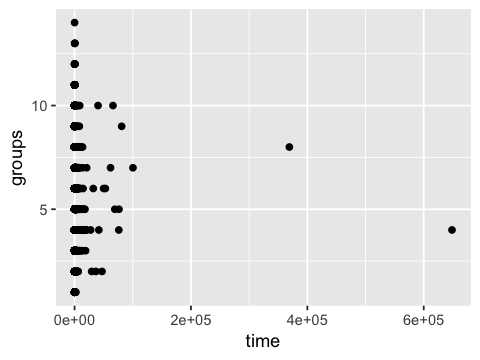

In [103]:
qplot(time, groups)

Можно поступить умнее и не делать лишних симуляций. Понятное дело, что пока паровозики выезжают из депо стабилизации не произойдёт. То есть $100$ минут точно пройдёт. Когда эти $100$ минут на выезд прошли, нам нужно понять как долго в каждой из групп аутсайдер будет догонять лидера. 

In [ ]:
x = c(0.2, 0.5, 0.3, 0.1, 0.4)



Чтобы понять насколько быстро группы из паровозиков стабилизируются, нам надо посмотреть на размах этих групп. В ситуации

```
0.1, 0.2, 0.3, 0.5, 0.4
```

у нас одна группа, в которой дольше всего второй поезд будет догонять первый. 





Самая первая скорость - минимальная. Никто не сможет отстать от первого паровозика. В итоге у нас будет только одна группа. 


```
0.2, 0.5, 0.3, 0.1, 0.4
```


__[д]__ Оцените $Cov(X, T)$.

In [11]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  снова код

In [12]:
### решение на бумажке

### [5]  Задачка 6

Денис тоже сидит в самоизоляции. Он берёт карты из хорошо перемешанной колоды с $36$ картами до тех пор, пока не возьмёт даму пик. 

__[а]__ Сколько в среднем бубновых карт он получит? 

Пусть каждая карта приносит Денису деньги согласно достоинству: шестёрка - $6$ рублей, $\ldots$, десятка - $10$рублей, валет - $11$ рублей, дама - $12$ рублей, король - $13$ рублей, туз - $14$ рублей. 

__[б]__ Какова вероятность того, что Денис наберёт меньше $100$ рублей? 

In [13]:
n_obs = 10**6

dost = c(6:10, "валет", "дама", "король", "туз") # возможные достоинства карт
mast = c("бубны", "черви", "пики", "крести")    # возможные масти

koloda = expand.grid(dost, mast) # декартово произведение

# сразу добавим в табличку id карт и денежные выигрыши
koloda$id = 1:36
koloda$value = rep(6:14, 4)

# названия столбцов
colnames(koloda) <- c("dost", "mast","id", "value")
head(koloda)
dim(koloda) # размерность таблицы

dost,mast,id,value
6,бубны,1,6
7,бубны,2,7
8,бубны,3,8
9,бубны,4,9
10,бубны,5,10
валет,бубны,6,11


[1] 36  4

In [26]:
# вытаскиваем 4 карты из колоды
z = sample(1:36, 4, replace=FALSE)
koloda[z,]

,dost,mast,id,value
19,6,пики,19,6
27,туз,пики,27,14
11,7,черви,11,7
12,8,черви,12,8


In [27]:
s = rep(0, n_obs)  # сюда записываем число очков
b = rep(0, n_obs)  # сюда записываем число бубновых карт

In [28]:
for (i in 1:n_obs) {
  z = sample(1:36, 36, replace=FALSE) # тасуем колоду

  # 25 - код пиковой дамы в таблице koloda
  id_dama = which(z==25)      # координата дамы
  id_nice = z[1:(id_dama-1)]  # коды карт до дамы
    
  # полученный выигрыш в i-ом опыте
  s[i] = sum(koloda$value[id_nice]) 
  
  # число бубновых карт до дамы в i-ом опыте
  b[i] = sum(koloda$mast[id_nice] == 'бубны')
}

In [29]:
mean(b)  # среднее число бубновых карт за n_obs опытов 

[1] 4.499826

In [30]:
mean(s < 100) # вероятность набрать больше 100 рублей

[1] 0.292022

### [10]  Задачка 7 (основано на реальных событиях) 

Филиппу $12$ лет, он играет в покер против своего брата Максима и его плюшевой обезьянки. Игра идёт в обычный покер без джокеров, колодой из $52$ карт, где всем игрокам сдаётся по $5$ карт на руки. 

С помощью симуляций расчитайте вероятности комбинаций: 

- Pair (пара) - две карты одного достоинства, три остальные - разного
- Two pairs (две пары)
- Three of kind (тройка) 
- Straight (стрит) - пять последовательных карт, есть карты разных мастей
- Flush (флэш) - все карты одной масти, но не последовательных достоинств
- Full House (фул-хаус) - три карты одного достоинства и две другого
- Four of Kind (каре) - четыре карты одного достоинства
- Straight Flush (стрит-флэш) - пять последовательных карт одной масти
- Royal Flush (роял-флэш) - старшие пять последовательных карт одной масти 



In [315]:
# Важно: это не техасский холдем, тут всё проще, но если вы симулировали его - это ок :) 

n_obs = 10**6

dost = c(2:10, "валет", "дама", "король", "туз") # возможные достоинства карт
mast = c("бубны", "черви", "пики", "крести")    # возможные масти

koloda = expand.grid(dost, mast) # декартово произведение

# сразу добавим в табличку id карт и денежные выигрыши
koloda$id = 1:52

# названия столбцов
colnames(koloda) <- c("dost", "mast","id")
head(koloda)
dim(koloda) # размерность таблицы

dost,mast,id
2,бубны,1
3,бубны,2
4,бубны,3
5,бубны,4
6,бубны,5
7,бубны,6


[1] 52  3

In [316]:
# Пока что нам вообще плевать что происходит с другими игроками, будем просто брать 5 карт из колоды

z = sample(1:52, 5, replace=FALSE)
my_cards = koloda[z,]
my_cards

,dost,mast,id
24,дама,черви,24
42,4,крести,42
33,8,пики,33
25,король,черви,25
46,8,крести,46


In [317]:
my_cards$dost # наша переменная - факторная, в Levels её уровни (фишка R)

[1] дама   4      8      король 8     
Levels: 2 3 4 5 6 7 8 9 10 валет дама король туз

In [318]:
summary(my_cards$dost)        # саммари по раскладке

2      3      4      5      6      7      8      9     10  валет   дама 
     0      0      1      0      0      0      2      0      0      0      1 
король    туз 
     1      0

In [319]:
dost_cnt = as.numeric(summary(my_cards$dost)) # достали количества для всех достоинств
dost_len = length(dost_cnt)
dost_cnt

# в векторе одна 2 => пара      (sum(dost_cnt == 2) == 1)&(sum(dost_cnt == 1) == 3) второе условие исключает фул-хаус
#           две  2 => две пары  (sum(dost_cnt == 2) == 2)
#           одна 3 => тройка    (sum(dost_cnt == 3) == 1)&(sum(dost_cnt == 1) == 2) второе условие исключает фул-хаус
#           одна 4 => каре      (sum(dost_cnt == 4) == 1)
#           2 и 3  => фул-хаус  (sum(dost_cnt == 2) == 1)&(sum(dost_cnt == 3) == 1)

[1] 0 0 1 0 0 0 2 0 0 0 1 1 0

In [320]:
order = which(dost_cnt > 0) # показывает позиции какие карты есть 
order

# разные достоинства, по очереди, не одной масти => cтрит  
# (sum(dost_cnt == 1) == 5)&(length(unique(diff(order))) == 1)&(length(unique(my_cards$mast)) > 1)

# разные достоинства, по очереди, одной масти => стрит-флэш
# (sum(dost_cnt == 1) == 5)&(length(unique(diff(order))) == 1)&(length(unique(my_cards$mast)) == 1)

# все одной масти, но не по очереди => флэш
# (length(unique(my_cards$mast)) == 1)&(length(unique(diff(order))) != 1)

# последние 5 по очереди одной масти => роял-флэш
# (sum(dost_cnt[(dost_len-5):dost_len]) == 5)&(length(unique(my_cards$mast)) == 1)

[1]  3  7 11 12

In [321]:
pair_cnt = 0           # пара
two_pair_cnt = 0       # две пары
three_of_kind_cnt = 0  # тройка
four_of_kind_cnt = 0   # каре
full_house_cnt = 0     # фул-хаус
straight_cnt = 0       # стрит
straight_flush_cnt = 0 # стрит-флэш
flush_cnt = 0          # флэш
royal_flush_cnt = 0    # флэш-роял 

n_obs = 10**6

for(i in 1:n_obs){
    # раздача карт 
    z = sample(1:52, 5, replace=FALSE)
    my_cards = koloda[z,]
    
    dost_cnt = as.numeric(summary(my_cards$dost))
    dost_len = length(dost_cnt)
    order = which(dost_cnt > 0)
    
    # подсчитываем успехи для каждого события
    pair_cnt = pair_cnt + as.integer((sum(dost_cnt == 2) == 1)&(sum(dost_cnt == 1) == 3)) 
    two_pair_cnt = two_pair_cnt + as.integer((sum(dost_cnt == 2) == 2))
    three_of_kind_cnt = three_of_kind_cnt + as.integer((sum(dost_cnt == 3) == 1)&(sum(dost_cnt == 1) == 2))
    four_of_kind_cnt = four_of_kind_cnt + as.integer((sum(dost_cnt == 4) == 1))
    full_house_cnt = full_house_cnt + as.integer((sum(dost_cnt == 2) == 1)&(sum(dost_cnt == 3) == 1))

    straight_cnt = straight_cnt + as.integer((sum(dost_cnt == 1) == 5)&(length(unique(diff(order))) == 1)&(length(unique(my_cards$mast)) > 1))
    straight_flush_cnt = straight_flush_cnt + as.integer((sum(dost_cnt == 1) == 5)&(length(unique(diff(order))) == 1)&(length(unique(my_cards$mast)) == 1))
    flush_cnt = flush_cnt + as.integer((length(unique(my_cards$mast)) == 1)&(length(unique(diff(order))) != 1))
    royal_flush_cnt = royal_flush_cnt + as.integer((sum(dost_cnt[(dost_len-5):dost_len]) == 5)&(length(unique(my_cards$mast)) == 1))
    }

# табличка с итоговыми вероятностями
data.frame("пара" = pair_cnt/n_obs, 
          "две пары"=two_pair_cnt/n_obs, 
          "тройка"=three_of_kind_cnt/n_obs,
          "каре"=four_of_kind_cnt/n_obs,
          "фул-хаус"=full_house_cnt/n_obs,
          "стрит"=straight_cnt/n_obs,
          "стрит-флэш"=straight_flush_cnt/n_obs,
          "флэш"=flush_cnt/n_obs,
          "флэш-роял"=royal_flush_cnt/n_obs)

пара,две.пары,тройка,каре,фул.хаус,стрит,стрит.флэш,флэш,флэш.роял
0.422197,0.047513,0.020997,0.000277,0.001397,0.005816,2.2e-05,0.001941,6e-06


У Филиппа на руках тройка королей (все, кроме пикового), дама пик и десятка треф. Какова вероятность, что его обыграет плюшевая обезьянка? 

In [322]:
library("dplyr")

# Выбросим карты  Фили

# 'дама' 'пики'     37
# '10' 'крести'     48
# 'король' 'крести' 51
# 'король' 'бубны'  12
# 'король' 'черви'  25

koloda_1 = koloda %>% filter(!id %in% c(37, 48, 51, 12, 25))

In [323]:
# Обезьянке надо побить тройку! Опять же что на руках у третьего игрока - неважно
n_obs = 10**6
monkey_win = 0

for(i in 1:n_obs){
    # раздача карт 
    z = sample(koloda_1$id, 5, replace=FALSE)
    my_cards = koloda_1[z,]
    
    dost_cnt = as.numeric(summary(my_cards$dost))
    dost_len = length(dost_cnt)

    # Straight
    usl_1 = (sum(dost_cnt == 1) == 5)&(length(unique(diff(order))) == 1)&(length(unique(my_cards$mast)) > 1)

    # Flush
    usl_2 = (length(unique(my_cards$mast)) == 1)&(length(unique(diff(order))) != 1)

    # Full House
    usl_3 = (sum(dost_cnt == 2) == 1)&(sum(dost_cnt == 3) == 1)

    # Four of Kind
    usl_4 = (sum(dost_cnt == 4) == 1)

    # Straight Flush
    usl_5 = (sum(dost_cnt == 1) == 5)&(length(unique(diff(order))) == 1)&(length(unique(my_cards$mast)) == 1)

    # Royal Flush
    usl_6 = (sum(dost_cnt[(dost_len-5):dost_len]) == 5)&(length(unique(my_cards$mast)) == 1)

    # Тройка тузов
    usl_7 = (dost_cnt[dost_len] == 3)
    
    monkey_win = monkey_win + as.integer(usl_1 | usl_2 | usl_3 | usl_4 | usl_5 | usl_6 |usl_7) 
}

monkey_win/n_obs

[1] 0.003932

__[бонусные 10]__ посчитайте все эти вероятности на бумажке руками.

* __Роял-флэш__  всего таких комбинаций $4$ штуки 

$$
P(A) = \frac{4}{C_{52}^5} \approx 0.00000154 = 1.54e-06
$$

* __Стрит-флэш__ их всего $4 \cdot 8 = 32$ штуки (от 2 до K)

$$
P(A) = \frac{32}{C_{52}^5} \approx 0.0000123 = 1.23e-05
$$

* __Карэ__ всего комбинаций четырёх одинаковых карт $13$, к ним может добавиться любая из оставшихся $48$ карт.

$$
P(A) = \frac{13 \cdot 48}{C_{52}^5} \approx 0.00024 = 2.4e-04
$$

* __Флэш__ всего есть $4$ масти, каждой по $13$ карт, значит может быть $4 \cdot C_{13}^5$ флэшей. Из общего числа надо удалить стрит-флэши и роял-флэши. 

$$
P(A) = \frac{4 \cdot C_{13}^5 - 32 - 4}{C_{52}^5} = 0.00196
$$

* __Фулл-хаус__ всего пар может быть $13 \cdot С_4^2$. К каждой паре может быть $12 \cdot С_4^3$ сетов. 

$$
P(A) = \frac{13 \cdot С_4^2 \cdot 12 \cdot С_3^4}{C_{52}^5} = 0.00144
$$


* __Стрит__ всего мастей $4$, всего комбинаций подряд $9$, карты могут быть любой масти, кроме одинаковой.

$$
P(A) = \frac{9 \cdot 4^5 - 4 - 32}{C_{52}^5} = 0.00353
$$


* __Сет__ всего возможно $13 \cdot C_4^3$ сетов. Ещё две карты можно добавить $C_48^2$ способами. Надо убрать фулл-хаусы. 

$$
P(A) = \frac{13 \cdot C_4^3 - 13 \cdot С_4^2 \cdot 12 \cdot С_3^4
$$

In [344]:
(9*4**5 - 4 - 32)/binom(52,5)

[1] 0.003532182

In [324]:
12*4

[1] 48

### [5]  Задачка 8

Коронавирус продолжает выкашивать людей! Мише это в конец надоело, поэтому он заперся в своей комнате, в общаге, и разработал новый тест на инфекцию. Тест Миши никогда не ошибается. Есть только один нюанс. Тест очень дорого производить, а тестировать на вирус придётся всю Россию. 

Миша довольно находчивый, и придумал способ сэкономить. Он предлагает разбить всех людей в России на группы по $k$ человек. Люди из одной группы сдают на анализ свои мазки из носоглотки. Дальше каким-то неведомым образом все эти мазки смешиваются в пробирке, и она сдаётся на тест. Если тест выявляет, что в пробирке всё хорошо, все $k$ человек объявляются здоровыми. Если тест говорит, что в пробирке был вирус, все $k$ человек сдают индивидуальные тесты для поиска больных. 

__[а]__ Будем предполагать, что вероятность того, что человек инфицирован в день теста составляет $p = 0.001$. На какое количество групп нужно разбить людей, чтобы сэкономить как можно больше тестов? Сколько в среднем тестов будет потрачено?  Ответьте на этот вопрос с помощью симуляций. Все симуляции проводите в расчёте на $1000$ человек.

In [168]:
# дробим группу на k групп и находим число проверок

check_cnt = function(x, k){    
    last_cnt = length(x) %% k                # людей в последней группе
    cnt = length(x) %/% k + (last_cnt > 0)   # число групп на проверку

    # матрица пациентов размерность [число групп x число людей в группе]
    if(last_cnt != 0){
        P = matrix(c(x, rep(0, (k - last_cnt))), nrow = cnt)
        } else {
        P = matrix(x, nrow = cnt)
    }

    pacients = sum(P[1:nrow(P)-1,] > 0) # число больных групп (кроме последней)
    
    # число проверок
    check = cnt +                            # проверили каждую группу
            k*pacients +                     # проверили всех пациентов в больных группах
            last_cnt*(sum(P[nrow(P),]) > 0)  # проверили всех из последней группы (если надо)
    return (check)
}

# одна группа из больных
x = sample(0:1, 1000, replace = TRUE, prob = c(0.999, 0.001))
check_cnt(x, 11)

[1] 91

In [177]:
# для каждого k от 2 до 100 делаем по 10**5 симуляций

n_obs = 10**4
k_mean = rep(0, 10)

for(k in 1:100){
    s = rep(0, n_obs) # число проверок в каждой симуляции
    for(i in 1:n_obs){
        x = sample(0:1, 1000, replace = TRUE, prob = c(0.999, 0.001))
        s[i] = check_cnt(x, k)
    }
    k_mean[k] = mean(s) # среднее число проверок при текущем разбиении
}

qplot(1:length(k_mean), k_mean)
k_min = which.min(k_mean)
cat("Оптимальное число групп: ", k_min, "\n")
cat("Среднее число тестов:", k_mean[k_min])

__[б]__ Предположим, что тест Миши всё-таки ошибается. Вероятность того, что он объявит здорового больным равна $0.02$. В обратную сторону ошибки не происходит. Какое значиние $k$ окажется оптимальным в таком случае? 

[1] 7

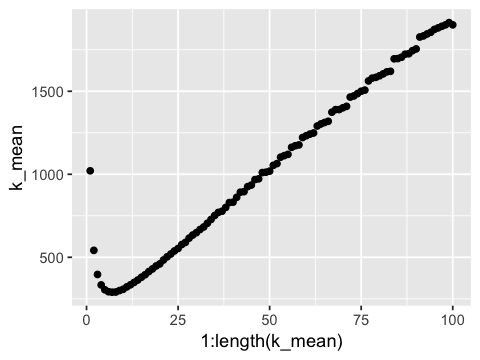

In [181]:
# Тут если хотябы один тест говорит, что группа больна тестируем всю группу
# То чо тест может сказать на отдельном человеке, что он болен ошибочно - игнорируем 
# 
# Новая вероятность того, что тестируется вся группа - p*q + p*(1-q) + (1-p)*q = p + (1-p)*q

p = 0.001 + (1 - 0.001)*0.02

n_obs = 10**4
k_mean = rep(0, 10)

for(k in 1:100){
    s = rep(0, n_obs) # число проверок в каждой симуляции
    for(i in 1:n_obs){
        x = sample(0:1, 1000, replace = TRUE, prob = c(1-p, p))
        s[i] = check_cnt(x, k)
    }
    k_mean[k] = mean(s) # среднее число проверок при текущем разбиении
}

qplot(1:length(k_mean), k_mean)
k_min = which.min(k_mean)
cat("Оптимальное число групп: ", k_min, "\n")
cat("Среднее число тестов:", k_mean[k_min])

__[бонусные 10]__ Попробуйте решить предыдущие два пункта руками для произвольных вероятностей $p$ и $q$. Как именно оптимальное $k$ зависит от этих вероятностей? 

__Hint:__ При решении уравнения, которое получится после взятия производной от математического ожидания числа проверок, можно воспользоваться разложением в ряд Тэйлора: $(1 - p)^x \approx 1 - px$. Это можно сделать, если мы предполагаем, что вероятность заболеть, $p$, очень маленькая.   

__Решение:__ 

Такая техника проведения анализа реально использовалась во время $2-$ой мировой войны. Задачку выдернул [с $13$ страницы Лагутина.](https://yadi.sk/i/UuWhEn_L4X_Rwg) Раздел называется "Поиск больных". Там же есть решение. Его тут и привожу. 

Будем для удобства считать, что $n$ всегда делится на $k$. Если не делится, то последняя группа будет не полностью укомплектована. Пусть $X_j$ - число проверок, которое надо сделать в группе $j$. Если там не было больных, это всего одна проверка. Один человек не болеет с вероятностью $1 - p$. Вся группа не болеет с вероятностью $(1 - p)^k$.

Если в группе были больные, то это проверка общей пробирки для группы, а также проверка каждого человека в ней, то есть $k + 1$ проверка. Это происходит, если есть хотябы один больной, то есть с вероятностью $1 - (1 - p)^k$.

Получается, что 

\begin{equation*}
X_j = \begin{cases} 
1, \text{ если все здоровы }, (1 - p)^k \\
k + 1, \text{ если есть больные }, 1 - (1 - p)^k.
\end{cases}
\end{equation*} 

Получается, что всего мы сделаем $Z$ проверок:

$$
Z = X_1 + \ldots + X_{\frac{n}{k}}.
$$ 

Наша задача минимизировать среднее число проверок, выбрав оптимальное число групп, то есть

$$
\mathbb{E}(Z) = \mathbb{E}(X_1 + \ldots + X_{\frac{n}{k}}) = \mathbb{E}(X_1) + \ldots +  \mathbb{E}(X_{\frac{n}{k}}) = \frac{n}{k} \cdot \mathbb{E}(X_1) = \frac{n}{k} \cdot \left[1 \cdot (1-p)^k + (k+1) \cdot (1 - (1 - p)^k) \right] \to \min_k.
$$ 

Упростим это математическое ожидание

$$
\mathbb{E}(Z) = n \cdot \left[1 + \frac{1}{k} - (1-p)^k \right] \to \min_k.
$$

Если влоб взять производную, у нас получится неразрешимое уравнение

$$
- \frac{1}{k^2} - (1 - p)^k \ln(1 - p) = 0.
$$

Можно попробовать решить его численно в R, а можно воспользоваться подсказкой про ряд Тэйлора, чтобы получить примерное решение в виде формулы. Мы можем воспользовать сяразложением 

$$
(1 - p)^k \approx 1 - p \cdot k
$$

в ситуациях, когда вероятность $p$ очень маленькая. Обычно мы раскладываем в ряд Тэйлора в окрестности нуля. Нам везёт, люди заболевают вирусом с низкой вероятностью, поэтому тут такое приближение нам подходит. 

$$
\mathbb{E}(Z) \approx n \cdot \left[1 + \frac{1}{k} - 1 + p \cdot k \right] \to \min_k.
$$

Тут уравнение решается

$$
- \frac{1}{k^2} + p = 0 \quad \Rightarrow \quad \hat k = \frac{1}{\sqrt{p}}
$$

Если предположить как в условиях задачи, что $p = 0.001$, нам надо будет включать в каждую группу $31$ человека. 

In [67]:
n = 1000
p = 0.001
1/sqrt(p)

[1] 31.62278

### [2]  Задачка 9

У Полины есть не только футболка студпассива, но и выборка, которая на $\frac{8}{10}$ пришла из нормального распределения с параметрами $0$ и $1$. Оставшаяся часть пришла из [распределения парето](http://ugrad.stat.ubc.ca/R/library/rmutil/html/Pareto.html) с параметарми $20$ и $2$. 

Правда ли, что хвосты такой смеси тяжелее, чем у стандартного нормального распределения? Нарисуйте гистограмму для смеси и плотность для нормального распределения на одной картинке, чтобы увидеть тяжесть хвостов. 

Кстати, Полина тоже сидит на самоизоляции дома и ей скучно. 

In [40]:
#install.packages("actuar")
library("actuar")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


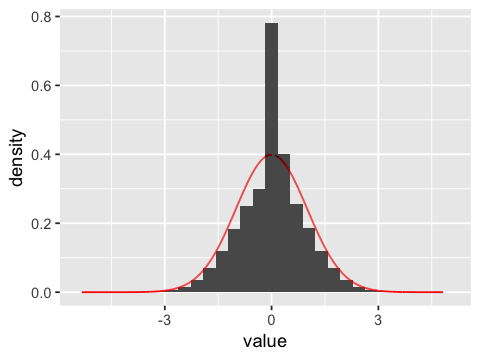

In [46]:
n_obs = 10**6
x = c(rnorm(0.8*n_obs), rpareto(0.2*n_obs, 20, 2))

df = data.frame(value = x)

ggplot(df , aes(x = value)) +
         geom_histogram(aes(y = ..density.. )) + 
         geom_line(aes(x = value, y = dnorm(value)), col = "red")

In [19]:
### ╰( ͡° ͜ʖ ͡° )つ──☆  кооод

### [3]  Задачка 10

Пущай у нас есть стрёмная функция распределения. Например, вот такая: 

$$
F(x) = \left( \frac{\ln x}{\ln \theta} \right)^{\alpha},  \quad x \in [1; \theta]
$$

Давайте сгенерим из неё выборку с помощью квантильного преобразования. 

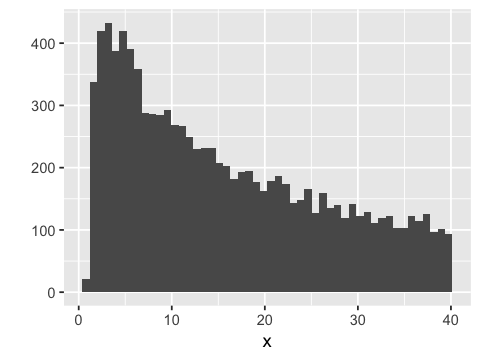

In [59]:
# для примера выберем какие-нибудь значиния параметра
theta = 40
alpha = 2

y = runif(10^4, min = 0, max = 1)
x = theta**(y**(1/alpha)) # обратная к F(x) функция
qplot(x, bins=50)

### [5]  Задачка 11

У древнего морского монстра ~~Коронавируса~~ Кракена $8$ ног-щупалец. Если отрубить одно щупальце, то взамен него с вероятностью $0.25$ отрастает новое, с вероятностью $0.25$ отрастает два новых, с вероятностью $0.5$, слава Океану, не вырастает ничего. 

Против Кракена бьётся сам Капитан! Он наносит точные удары и безупречно умело уворачивается от ударов Кракена. 

__[а]__ Какова вероятность того, что Капитан победит, отрубив ровно $10$ щупалец? 

__[б]__ Какова вероятность, что бой Капитана и Кракена продлиться вечно? 

__[в]__ Сколько щупалец в среднем отрубит Капитан прежде, чем победит? 

Ответьте на эти вопросы с помощью симуляций.

In [199]:
# функция для одного боя с монстром

the_battle = function(){
    legs = 8
    chop = 0

    # бой останавливается если не осталось щупалец или их больше 1000 (чтобы не было вечного цикла)
    while (legs > 0 & chop < 1000){
        k = sample(x = c(1,2,0), size = 1, prob = c(0.25,0.25,0.5))
        legs = legs + k - 1 # отросло k штук и отрубили 1 
        chop = chop + 1 # число отрубленных за бою щупалец
    }

    return(chop)
}

the_battle()

[1] 52

In [200]:
# делаем кучу битв
n_obs = 10**6
s = rep(0, n_obs)

for(i in 1:n_obs){
    s[i] = the_battle()
}

In [201]:
mean(s == 10) # P(X = 10)
mean(s > 900) # добирались ли мы вообще до 1000
mean(s)       # E(X) 

[1] 0.012862

[1] 0

[1] 31.99279

__[бонусные 10]__ А также ручкой на бумаге! Если есть желание научиться решать подобные рекурсивные задачки, можно посмотреть [серию видосов от моего любимого ББ.](https://vimeo.com/showcase/2521777) Смотреть с первого :) 

__Решение:__ 

__[а]__ Если отрублено $10$ щупалец, значит либо был один удар породивший два новых щупальца, либо было два удара, породивших по одному новому, а все остальные удары не порождали новых щупалец. 

$$
8 \cdot 0.5^9 \cdot 0.25^{1} + C_8^2 \cdot 0.5^{8} \cdot 0.25^2
$$

In [187]:
binom = function(n,k) factorial(n)/(factorial(k)*factorial(n-k))
8*0.5**9*0.25 + binom(8,2)*0.5**8*0.25**2

[1] 0.01074219

__[б]__ Вероятность вечного боя равна нулю. Достаточно доказать, что с вероятностью один за конечное время побеждается одноногий кракен. А эта вероятность удовлетворяет уравнению 

$$
p = 0.25 \cdot p + 0.25 \cdot p^2 + 0.5.
$$

Единственный осмысленный корень у этого уравнения - $1$.

__[в]__ Замечаем, что на победу над $k$-щупальцевым Кракеном уходит в $k$ раз больше ударов в среднем, чем на победу над $1-$ щупальцевым. Отсюда: 

$$
e_1 = 1 + 0.5 \cdot 0 + 0.25 \cdot e_1 + 0.25 \cdot 2 \cdot e_1
$$

Решаем уравнение, получаем $e_1 = 4$ и $e_8 = 32$. 

-----------------------

### [5] Задачка 12

У распределения Хи-квадрат есть милое свойство. Известно, что если $X_1, \ldots, X_n \sim iid~N(0,1)$, тогда имеет место следующая сходимость по веротяности:

$$
\frac{\chi^2_n}{n} = \frac{X_1^2 + \ldots + X_n^2}{n} \to  1
$$

Продемонстрируйте с помощью симуляций в R, что это именно так. От вас требуется построить ту же картинку, что мы строили при иллюстрации ЗБЧ. Не забудьте построить для нескольких разных $\varepsilon$ коридоры и убедиться, что последовательность с некоторого момента начинает пробивать их довольно редко.

__Решение:__ 

__Важно:__ вы же понимаете, что это свойство следует из ЗБЧ? Для случайной величины $\chi^2_n$ математическое ожидание равно $n$, выходит что в пределе при делении на $n$ должно получиться число $1$.

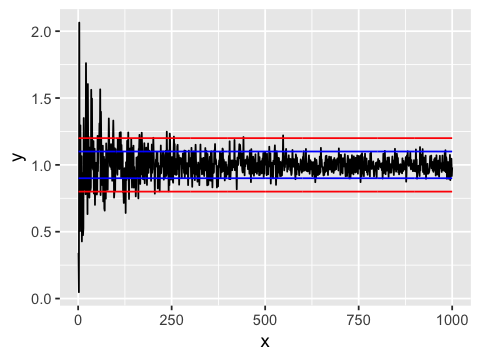

In [60]:
### ╰( ͡° ͜ʖ ͡° )つ──☆  наколдуй немного магии
n_obs = 10^3       # число симуляций
s = rep(0, n_obs)  # сюда будем закидывать члены последовательности

for(i in 1:n_obs){
    s[i] = mean(rnorm(i)^2)
}

eps1 = 0.2
eps2 = 0.1

ggplot(data.frame('x'=1:n_obs, 'y'=s)) + 
  geom_line(aes(x, y)) +

  geom_line(aes(x, 1+eps1), col='red')+
  geom_line(aes(x, 1-eps1), col='red')+

  geom_line(aes(x, 1+eps2), col='blue')+
  geom_line(aes(x, 1-eps2), col='blue')

In [ ]:


samp <- 
#засунем все в датафрейм чтобы рисовать
dat <- tibble(value = samp)
#рисуем


In [20]:
### ╰( ͡° ͜ʖ ͡° )つ──☆  напиши в меня коооод

Хорошо! Теперь зафиксируйте несколько коридоров также, как мы делали это на паре и пронаблюдайте, как ведут себя вероятности пробить эти коридоры при увеличении $n$.

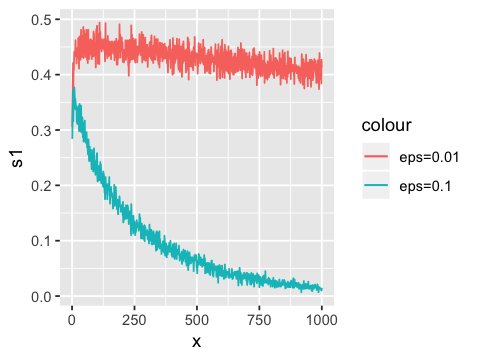

In [61]:
### ╰( ͡° ͜ʖ ͡° )つ──☆  наколдуй немного магии

s1 <- rep(0,times=n_obs) # вектор из нулей для первого коридора
s2 <- rep(0,times=n_obs) # вектор из нулей для второго коридора

for(i in 1:n_obs){
    x <- rep(0,times=1000)
    for(j in 1:1000){
        x[j] <- mean(rnorm(i)^2)
    }
    s1[i] <- sum(abs(x) > 1+0.01)/1000
    s2[i] <- sum(abs(x) > 1+0.1)/1000
    }

ggplot(data.frame('x'=1:n_obs, 's1'=s1, 's2'=s2)) + 
  geom_line(aes(x, s1, color='eps=0.01')) +
  geom_line(aes(x, s2, color='eps=0.1'))

# для узкого коридора убывание идёт совсем медленно :) 

Учитывая, что последовательность случайных величин, приведённая выше, сходится к константе, то есть к вырожденному распределению, дисперсия этой последовательности должна сходится к нулю. Продемонстрируйте, что это действительно так. Для этого нужно скопипастить код из второго пункта и немного отредактировать его.  

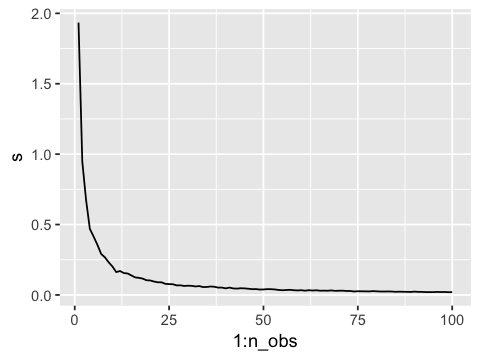

In [62]:
### ╰( ͡° ͜ʖ ͡° )つ──☆  наколдуй немного магии

n_obs = 100
s <- rep(0,times=n_obs) # вектор из нулей для дисперсий

for(i in 1:n_obs){
    x <- rep(0,times=1000)
    for(j in 1:1000){
        x[j] <- mean(rnorm(i)^2)
    }
    s[i] <- var(x)
    }

qplot(1:n_obs, s, geom='line')

Если вы хорошо разбирались в лекциях по математической статистике, у вас должна была возникнуть в голове аналогия с Достаточным условием Чебышёва. Оно говорит, что если оценка неизвестного параметра является несмещённой, $E(\hat \theta) = \theta$ и дисперсия этой оценки стремится к нулю, $Var(\hat \theta) \to 0$ при $n \to \infty$, то эта оценка состоятельна. 

Попробуйте ещё раз посмотреть на картинку, которую вы получили выше и переосмыслить это условие. Также не помешает немного подумать о состоятельности оценки и вспомнить определение состоятельности. 

In [25]:
### ╰( ͡° ͜ʖ ͡° )つ──☆  наколдуй немного магии

### [5] Задачка 13

Ксюша ... сидит на самоизоляции. У неё есть куча книг и интернет, но она всё-равно скучает. Скучает по Василию Павловичу Решетникову и его лекциям по матстату. Ей безумно не хватает его экспрессии и таланта расказсчика. Поэтому, чтобы унять всю свою сердечную боль и пустоту, она читает книги [Черновой](https://github.com/FUlyankin/r_probability/raw/master/books/Хороший%20учебник%20по%20матстату.pdf) и [Лагутина](https://yadi.sk/i/UuWhEn_L4X_Rwg) про матстат. 

Сегодня тоска окончательно разъела сердце Ксюши. Поэтому она стала генеировровать равномерные случайные величины. 

- Ксюша взяла независимые случайные величны $X, Y \sim U[1,2]$. Немного поколдовав, она получила случайную величину $Z = \frac{X}{X + Y}$. С помощью симуляций оцените математическое ожидание этой случайной величины сначала на $10$, потом на $11$, $\ldots$ , потом на $1000$ наблюдениях. Нарисуйте картинку, на которой будет видно к чему сходится эта оценка. 

In [26]:
### ╰( ͡° ͜ʖ ͡° )つ──☆  наколдуй немного магии

n <- 10000
means <- rep(0,n)
for(i in 1:n){
  x <- runif(i,1,2)
  y <- runif(i,1,2)
  z <- x/(x+y)
  means[i] <- mean(z)
}
k <- seq(1,n,1)
df <- data.frame(k)
ggplot(data=df,aes(x=k,y=means))+
  geom_line()+
  geom_hline(yintercept=0.5,col="red",size=1)

- Тепреь Ксюша взяла независимые случайные величны $X, Y \sim U[-1,1]$. Постройте для $Z$ по аналогии с предыдущей картинку, на которой будет показано к чему сходится оценка математического ожидания этой случайной величины. Как думаете, почему с этой случайной величиной происходит такая странность?

In [27]:
### ╰( ͡° ͜ʖ ͡° )つ──☆  наколдуй немного магии

means <- rep(0,n)
for(i in 1:n){
  x <- runif(i,-1,1)
  y <- runif(i,-1,1)
  z <- x/(x+y)
  means[i] <- mean(z)
}
k <- seq(1,n,1)
df <- data.frame(k)
ggplot(data=df,aes(x=k,y=means))+
  geom_line()+
  geom_hline(yintercept=0,col="red",size=1)


## [35+] Кит-рисёрчер

**Добро пожаловать в Кита. Кит — это большая рисёрчерская задача с огромным количеством вопросов. В ките есть как ручные вопросы, так и вопросы для симуляций. За каждый вопрос даётся какое-то количество баллов. В каких-то вопросах требуется решить задачу руками на бумажке. В каких-то вопросах требуется произвести симуляцию в R. Продвинтесь в своём рисёрче над этим китом как можно глубже и срубите куш из баллов.** 

На Земле есть филиал ада. Расположен он в Москве, утром, в час пик, на кончике лиловой ветки метро. Эта задача про него. 

Южный кончик лиловой ветки Московского метро состоит из станций: 

    ж  Пролетарская (впервые есть пересадка, люди выходят)    
    п  Волгоградский проспект  
    п  Текстильщики   
    ж  Кузьминки   
    п  Рязянский проспект  
    ж  Выхино  
    ж  Лермонтвоский проспект   
    ж  Жулебино (конечная)


Каждое утро на ветке разворачиваются драмматические события:

* Поезд едет от станции к станции $5$ минут. Из депо поезда запускают каждые 5 минут. В одном поезде помещается $500$ человек. Вместимость поезда описывается переменной $full$, которая принимает значение от $0$ до $1$ (доля занятых мест).
* Рассматривается период работы метро с $6$ часов утра до $15$ часов дня. 

* Разница во времени пика интенсивности между двумя соседними станциями состовляет $30$ минут. Так, в Жулебино максимальная интенсивность наблюдается в $07:30$, на Лермонтовском проспекте в $08:00$ и так далее.

* Все станции делятся на два типа: промышленные и жилые. Пик интенсивности на промышленных станциях в три раза ниже. 

![](https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars_2020/HW/train_arrive.png)

In [28]:
station_name = c('жулебино', 'лермонтовский проспект', 'выхино', 'рязанский проспект', 
                'кузьминки', 'текстильщики', 'волгоградский проспект', 'пролетарская')

station_kind = c('ж', 'ж', 'ж', 'п', 'ж', 'п', 'п', 'ж')

Люди прибывают на платформу, чтобы сесть в поезд: 

* Случайная величина $Z \sim Poiss(\lambda)$ - число людей, которое прибыло на платформу в течение минуты. Интенсивность $\lambda$ зависит от времени и изменяется по функции: 

In [29]:
sigmoida = function(x) return(1/(1 + exp(-0.03*x)))
f = function(x) return(sigmoida(x)*(1 - sigmoida(x)))
f(5)

[1] 0.248599

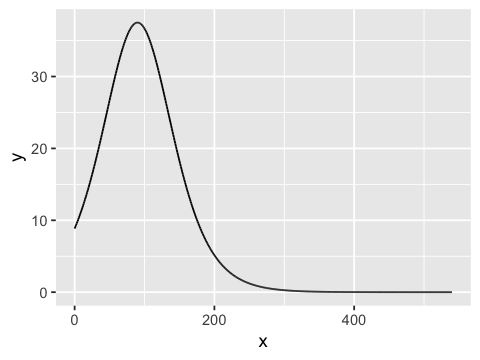

In [30]:
x = seq(0,540,0.01)
y = 150*f(x - 90)         # для жилых станций множитель 150 (высокий пик)
qplot(x, y, geom ='line') # пик на Жулебино в 7:30 (через 90 минут после открытия )

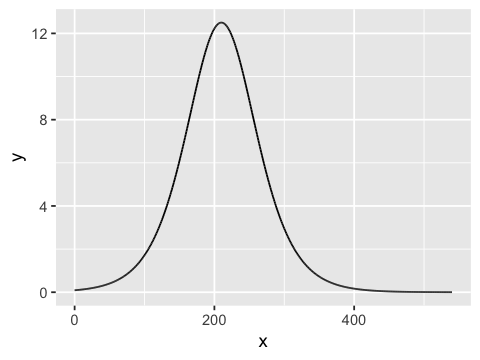

In [31]:
x = seq(0,540,0.01)
y = 50*f(x - 210)         # для промышленных станций множитель 50 (низкий пик)
qplot(x, y, geom ='line') # пик на Рязанском проспекте в 9:30 (через 210 минут после открытия)

Люди пытаются уехать на работу, но удаётся это далеко не всем:

* Каждый человек, который оказался на платформе, пытается зайти в поезд. Случайная величина $X$ принимает значение $1$, если ему это удаётся. Вероятность оказаться в поезде зависит от того насколько он заполнен: 

$$
P(X = 1) = 1 - (full)^k,
$$

где $full$ - доля, на которую загружен поезд, а $k$ - параметр, отвечающий за решимость людей садиться в него. Так, для Жулебино он равен $0.2$, потому что на очень то хочется заходить в поезд, где не осталось пустых сидений. Лучше подождать новый и присесть. Для Кузьминок он равен $2.6$, потому что поезда приезжают переполненными и люди настроены более решительно. 

* Будем считать, что люди заходят в поезд по очереди. Сначала первый, потом второй, потом третий и тд. После каждого нового зашедшего человека $full$ меняется и вероятность считается уже с новым значением параметра.


![](https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars_2020/HW/fullnes.png)

Вам предстоит просимулировать каждую минуту этого прекрасного утра на своём компьютере и ответить на вопросы: 

__а)__  На какой станции скапливается максимальное число людей? Во сколько это происходит? Постройте картинки с зависимостью числа людей на платформе от времени для каждой станции. Есть ли на этих картинках что-то странное? Как бы вы это объяснили? 

__б)__  Администрация метро хочет противодействовать проблемам со скапливанием людей. Для этого она придумывает стратегию "пустой поезд". Каждый пятый поезд, приезжающий в Кузьминки будет пустым. Он будет проезжать мимо всех станций и забирать людей из Кузьминок. Выберите оптимальное время запуска пустого поезда, руководствуясь результатами из пункта а). Насколько сильно такая стратегия ухудшит состояние всех оставшихся станций? Правда ли, что Кузьминки вздохнут спокойно и разгрузятся? 

__в)__  Администрация метро решила, что будет считать проблемы, возникающие при загрузке как сумму всех людей на станциях. На какую станцию оптимальнее всего посылать каждый пятый поезд пустым, чтобы минимизировать эту величину? 

Лучшее решение этой задачи будет направлено в мэрию. И Москва похорошеет ещё пуще прежнего. 

In [32]:
# Ваш код

__ВАЖНО:__ Задача в плане своего условия сформулированна очень громоздко и непонятно. Бонусные баллы можно получить, если придумать как упростить формулировку не потеряв в смысле. Также бонусные баллы можно получить за интересные идеи для симуляций. 